In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Local imports
!pip install zat
import zat
from zat.log_to_dataframe import LogToDataFrame
from zat.dataframe_to_matrix import DataFrameToMatrix

# Printing versions
print('zat: {:s}'.format(zat.__version__))
print('Numpy: {:s}'.format(np.__version__))


     |████████████████████████████████| 184kB 12.1MB/s 
     |████████████████████████████████| 204.8MB 79kB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 204kB 48.8MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.2-py2.py3-none-any.whl size=205186687 sha256=8b9f89758f331c3df045899813dd59bf7c9504441f5df48b64f95861fd100ad9
  Stored in directory: /root/.cache/pip/wheels/8b/09/da/c1f2859bcc86375dc972c5b6af4881b3603269bcc4c9be5d16
Successfully built pyspark
zat: 0.4.1
Numpy: 1.19.5


## Quickly go from Zeek log to Pandas DataFrame

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Create a Pandas dataframe from a Zeek log
log_to_df = LogToDataFrame()
zeek_df = log_to_df.create_dataframe('/content/drive/MyDrive/Universita/Magistrale/Tesi/ZeekML/Logs/conn.log')

# Print out the head of the dataframe

zeek_df.head(500).

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
ts,,,,,,,,,,,,,,,,,,,,
2021-01-04 16:57:25.331677914,CSPlGWrbAlRuCyb7e,192.168.1.7,38420,192.168.1.4,102,tcp,NaN,NaT,<NA>,<NA>,OTH,NaN,NaN,0,R,1,52,0,0,NaN
2021-01-04 16:57:25.330084085,CIxmyQA6IYnY5Z1i6,192.168.1.7,38598,192.168.1.4,102,tcp,NaN,0 days 00:00:00.002029,0,0,SF,NaN,NaN,0,ShAFf,4,216,2,112,NaN
2021-01-04 16:57:25.335592031,CezOVN3gMXvlN61KF7,192.168.1.7,38602,192.168.1.4,102,tcp,NaN,0 days 00:00:00.002643,0,0,SF,NaN,NaN,0,ShAFf,4,216,2,112,NaN
2021-01-04 16:57:25.331678867,CSMohI3nFMPKT70EP6,192.168.1.7,38600,192.168.1.4,102,tcp,s7comm,0 days 00:00:00.005759,80,69,S1,NaN,NaN,0,ShADad,8,504,7,441,NaN
2021-01-04 17:07:11.502109051,CBNQWd3wmjKKIeErw2,198.199.98.246,53534,192.168.1.4,102,tcp,NaN,0 days 00:00:00.199745,0,0,SF,NaN,NaN,0,ShAFf,4,216,2,112,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-14 23:38:01.722543001,CJXP3fALOwAWJbbM5,178.79.129.208,55842,192.168.1.4,102,tcp,NaN,0 days 00:00:01.553162,5,0,RSTO,NaN,NaN,0,ShADaFR,5,273,2,112,NaN
2021-01-14 23:38:03.276030064,CCnMn83gy35oUWfy5,178.79.129.208,56452,192.168.1.4,102,tcp,NaN,0 days 00:00:01.552174,8,0,RSTO,NaN,NaN,0,ShADaFR,5,276,2,112,NaN
2021-01-15 01:59:22.361406088,CqEWb74oDAaOD2MDbe,196.52.43.123,56975,192.168.1.4,502,tcp,NaN,0 days 00:00:00.053072,0,0,RSTO,NaN,NaN,0,ShR,2,84,1,44,NaN



Plottiamo il numero di ocorrenze per tipo di funzione invocata

https://github.com/amzn/zeek-plugin-s7comm/blob/master/scripts/consts.zeek

Sezione const cotp_types

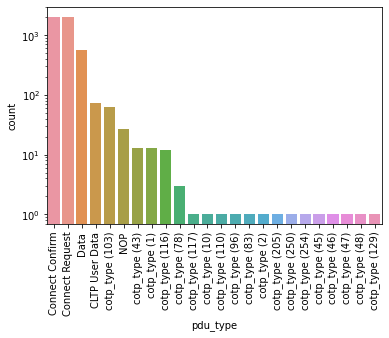

In [ ]:
#print(zeek_df['pdu_type'].value_counts())
#zeek_df['pdu_type'].value_counts().plot.bar()


#plt.hist(zeek_df['pdu_type'], log=True) 

s7_fc_plot= seaborn.countplot(data=zeek_df, x='pdu_type', order=zeek_df.pdu_type.value_counts().index)
s7_fc_plot.set(yscale="log")
plt.xticks(rotation=90)
plt.show()



#S7comm COTP requests in Latex

In [ ]:
print(zeek_df['pdu_type'].value_counts().to_latex())

\begin{tabular}{lr}
\toprule
{} &  pdu\_type \\
\midrule
Connect Confirm &      2055 \\
Connect Request &      2055 \\
Data            &       560 \\
CLTP User Data  &        73 \\
cotp\_type (103) &        62 \\
NOP             &        27 \\
cotp\_type (43)  &        13 \\
cotp\_type (1)   &        13 \\
cotp\_type (116) &        12 \\
cotp\_type (78)  &         3 \\
cotp\_type (117) &         1 \\
cotp\_type (10)  &         1 \\
cotp\_type (110) &         1 \\
cotp\_type (96)  &         1 \\
cotp\_type (83)  &         1 \\
cotp\_type (2)   &         1 \\
cotp\_type (205) &         1 \\
cotp\_type (250) &         1 \\
cotp\_type (254) &         1 \\
cotp\_type (45)  &         1 \\
cotp\_type (46)  &         1 \\
cotp\_type (47)  &         1 \\
cotp\_type (48)  &         1 \\
cotp\_type (129) &         1 \\
\bottomrule
\end{tabular}



## Looking for Country


Deleting rows that include local IP address



In [ ]:
zeek_df = zeek_df[~zeek_df['id.orig_h'].isin(['192.168.1.7'])]

89.248.165.81      3872
27.122.12.247        68
27.122.12.232        54
139.162.99.243       48
178.73.215.171       40
                   ... 
192.241.206.247       1
192.241.206.240       1
192.241.195.46        1
192.241.221.72        1
192.168.1.7           0
Name: id.orig_h, Length: 123, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  app.launch_new_instance()


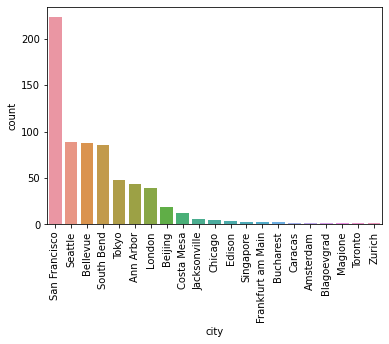

In [ ]:
!pip install maxminddb-geolite2
!pip install pygeoip  
!pip install tikzplotlib
import tikzplotlib

import seaborn
import pandas as pd
from geolite2 import geolite2

def get_city(ip):
    try:
        x = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return x['city']['names']['en'] if x else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()




# get unique IPs
unique_ips = zeek_df['id.orig_h'].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> city
print(zeek_df['id.orig_h'].value_counts())

zeek_df['city'] = zeek_df['id.orig_h'].map(unique_ips.apply(get_city))

#print(zeek_df['city'])


#plot logarithmic
zeek_df['city'].value_counts().plot.bar()


actors_plot = seaborn.countplot(data=zeek_df, x='city', order=zeek_df.country.value_counts().index)
plt.xticks(rotation=90)
plt.show()
#geolite2.close()



##Looking for DNS (vedi distro ip Zanero)


In [ ]:
!pip install dnspython
from dns import resolver,reversename
import dns.exception

def get_dns(ip):
    try:
        return str(resolver.query(reversename.from_address(ip), 'PTR')[0])
    except dns.exception.DNSException:
        return pd.np.nan

unique_ips = zeek_df['id.orig_h'].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> country
print(zeek_df['id.orig_h'])

zeek_df['dns'] = zeek_df['id.orig_h'].map(unique_ips.apply(get_dns))

print(zeek_df['dns'].value_counts())


#zeek_df['dns'].value_counts().plot.bar()




ts
2021-01-04 18:37:55.898025990      82.53.128.61
2021-01-04 19:24:14.342796087      71.6.167.124
2021-01-04 19:24:14.343363047      71.6.167.124
2021-01-04 19:24:14.534172058      71.6.167.124
2021-01-04 19:24:14.534384011      71.6.167.124
                                      ...      
2021-02-05 02:17:32.414690018    167.248.133.39
2021-02-05 02:17:32.565212011    167.248.133.39
2021-02-05 02:17:32.565466881    167.248.133.39
2021-02-05 02:17:32.717113972    167.248.133.39
2021-02-05 02:17:32.717433929    167.248.133.39
Name: id.orig_h, Length: 4887, dtype: category
Categories (123, object): ['128.199.5.111', '138.197.148.52', '139.162.99.243', '139.219.13.13', ...,
                           '89.47.62.108', '91.241.19.60', '93.174.95.106', '95.211.230.211']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: please use dns.resolver.resolve() instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if __name__ == '__main__':


scanner-07.ch1.censys-scanner.com.    56
scan-42.security.ipip.net.            48
scanner-04.ch1.censys-scanner.com.    48
scanner-09.ch1.censys-scanner.com.    48
scanner-08.ch1.censys-scanner.com.    40
                                      ..
zg-1218b-4.stretchoid.com.             1
zg-1218a-245.stretchoid.com.           1
zg-1218c-115.stretchoid.com.           1
zg-1218c-323.stretchoid.com.           1
zg-1218a-222.stretchoid.com.           1
Name: dns, Length: 75, dtype: int64


##Number of connections per actor (unique).

 A handful of actors generates the majority of the ICS traffic.

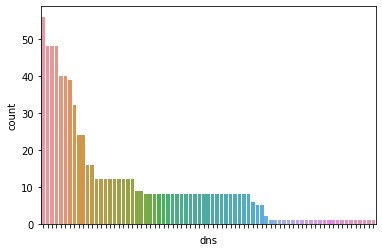

In [ ]:

actors_plot = seaborn.countplot(data=zeek_df, x='dns', order=zeek_df.dns.value_counts().index)
actors_plot.set(xticklabels=[]) 
plt.show()

##Looking for Organization (ToDo)

> Indented block



In [ ]:
!pip install geoip2

import geoip2.database
with geoip2.database.Reader() as reader:
  response = reader.isp('a.b.c.d')
  response.autonomous_system_number

#Upload maxmind geoasn then put to drive

#Try catch asn exception

AttributeError: ignored